# Kütüphane Yüklemeleri

In [1]:
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt
import os
os.chdir("C:/Users/omerm/OneDrive/Masaüstü")

# Veri Seti hakkında bilgilendirme

model=Arabanın modeli

year=üretim tarihi

price=Arabanın fiyatı

transmission=Vites türü

mileage=Mil

fuelType=Yakıt türü

tax=vergi

mpg=mil başına tükettiği benzin(galon cinsinden)

engineSize=Motor boyutu

# Veri yükleme

In [2]:
df=pd.read_csv("merc.csv")
data=df.copy()

In [3]:
data.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,SLK,2005,5200,Automatic,63000,Petrol,325,32.1,1.8
1,S Class,2017,34948,Automatic,27000,Hybrid,20,61.4,2.1
2,SL CLASS,2016,49948,Automatic,6200,Petrol,555,28.0,5.5
3,G Class,2016,61948,Automatic,16000,Petrol,325,30.4,4.0
4,G Class,2016,73948,Automatic,4000,Petrol,325,30.1,4.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13119 entries, 0 to 13118
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         13119 non-null  object 
 1   year          13119 non-null  int64  
 2   price         13119 non-null  int64  
 3   transmission  13119 non-null  object 
 4   mileage       13119 non-null  int64  
 5   fuelType      13119 non-null  object 
 6   tax           13119 non-null  int64  
 7   mpg           13119 non-null  float64
 8   engineSize    13119 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 922.6+ KB


### Eksik veri var mı ?

In [5]:
data.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
year,13119.0,2017.296288,2.224709,1970.0,2016.0,2018.0,2019.0,2020.0
price,13119.0,24698.596920,11842.675542,650.0,17450.0,22480.0,28980.0,159999.0
mileage,13119.0,21949.559037,21176.512267,1.0,6097.5,15189.0,31779.5,259000.0
tax,13119.0,129.972178,65.260286,0.0,125.0,145.0,145.0,580.0
mpg,13119.0,55.155843,15.220082,1.1,45.6,56.5,64.2,217.3
engineSize,13119.0,2.071530,0.572426,0.0,1.8,2.0,2.1,6.2


In [7]:
import researchpy as rp

In [8]:
rp.summary_cont(data.select_dtypes(include=["int64","float64"]))

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,year,13119.0,2017.2963,2.2247,0.0194,2017.2582,2017.3344
1,price,13119.0,24698.5969,11842.6755,103.3950,24495.9278,24901.2661
2,mileage,13119.0,21949.5590,21176.5123,184.8860,21587.1557,22311.9624
3,tax,13119.0,129.9722,65.2603,0.5698,128.8553,131.0890
4,mpg,13119.0,55.1558,15.2201,0.1329,54.8954,55.4163
5,engineSize,13119.0,2.0715,0.5724,0.0050,2.0617,2.0813


In [74]:
import scipy.stats as stat
varianca=stat.describe(data.select_dtypes(include=["float64","int64"]))[3]
skewness=stat.describe(data.select_dtypes(include=["float64","int64"]))[4]
kurtosis=stat.describe(data.select_dtypes(include=["float64","int64"]))[5]

In [76]:
pd.concat([data.describe([0.05,0.1,0.25,0.3,0.5,0.75,0.9]).T,pd.DataFrame({
"variance":varianca,"skewness":skewness,"kurtosis":kurtosis
},index=data.describe().T.index)],axis=1)

,count,mean,std,min,5%,10%,25%,30%,50%,75%,90%,max,variance,skewness,kurtosis
year,13119.0,2017.296288,2.224709,1970.0,2014.0,2015.0,2016.0,2016.0,2018.0,2019.0,2019.0,2020.0,4.949331e+00,-2.897231,25.846402
price,13119.0,24698.596920,11842.675542,650.0,11649.0,13868.4,17450.0,18449.0,22480.0,28980.0,38000.0,159999.0,1.402490e+08,2.650461,15.441843
mileage,13119.0,21949.559037,21176.512267,1.0,1000.0,1987.0,6097.5,8069.4,15189.0,31779.5,49277.4,259000.0,4.484447e+08,1.884203,6.290549
tax,13119.0,129.972178,65.260286,0.0,20.0,20.0,125.0,145.0,145.0,145.0,150.0,580.0,4.258905e+03,1.231735,9.828966
mpg,13119.0,55.155843,15.220082,1.1,31.7,36.7,45.6,47.1,56.5,64.2,68.9,217.3,2.316509e+02,2.157475,16.459044
engineSize,13119.0,2.071530,0.572426,0.0,1.3,1.5,1.8,2.0,2.0,2.1,3.0,6.2,3.276716e-01,2.135384,8.833675


### Çıkarımlar:
1-year değişkeni sola çarpık ve Sivri bir dağılıma sahip (ortalama std'den büyük olduğundan bu açıkça görünüyor) . Bu değişken 2015-2018 civarında değerlerde dolaşırken
bazı aykırı değerlere sahip (1970 gibi)

2-price değişkeni sağa çarpık ve sivri bir dağılıma sahip. Ortalama ve median değerleri birbirlerine yakın ancak %5'ten küçük ve %90'dan büyük dağılımlar ortalama değerinden 
çok farklı değere sahip. Bu da ortalamayı etkiliyor olabilir. 160000 değeri ortalamayı çok etkiliyor olabilir.

3-mileage değişkeni ortalama ve median arasında hafif bir farklılık mevcut. Ancak minimum ve maksimum değere bakılırsa oldukça farklı değerler mevcut.

4-tax değişkeninin ortalama ve median değerleri birbirinden farklı ancak dağılıma bakılırsa bunu etkileyen farklı şeyler mevcut. Örneğin %30 %50 ve %75'lik dağılım dilimlerine bakılırsa
değerler hep sabit iken ortalama değeri düşük çıkmış. Bu da demek oluyor ki aşırı derecede küçük değerler var kı ortalama değeri bu kadar düşmüş.

5-mpg değişkeninde ortalama ve median değerleri neredeyse aynı.Bu da dağılımın güzel dağıldığı hakkında bize bilgi veriyor olabilir.

6-enginSize değişkeninde de ortalama ve median değerleri iyi dağılmış olabileceğini gösteriyor ancak enginSize değerinin 0 olabileceği durumu kafa karıştırıcı.

In [77]:
cat_var=data.select_dtypes(include=["object"])
cat_var.head()

,model,transmission,fuelType
0,SLK,Automatic,Petrol
1,S Class,Automatic,Hybrid
2,SL CLASS,Automatic,Petrol
3,G Class,Automatic,Petrol
4,G Class,Automatic,Petrol


In [78]:
rp.summary_cat(cat_var)

,Variable,Outcome,Count,Percent
0,model,C Class,3747,28.56
1,,A Class,2561,19.52
2,,E Class,1953,14.89
3,,GLC Class,960,7.32
4,,GLA Class,847,6.46
5,,B Class,591,4.50
6,,CL Class,511,3.90
7,,GLE Class,461,3.51
8,,SL CLASS,260,1.98
9,,CLS Class,237,1.81


In [79]:
cat_var.describe()

,model,transmission,fuelType
count,13119,13119,13119
unique,27,4,4
top,C Class,Semi-Auto,Diesel
freq,3747,6848,9187


### Çıkarımlar:
1-model değişkeninin dağılımı incelendiğinde çok sınıflı kategorik bir yapıya sahip. Ancak sınıflardaki veri dağılımı homojen değil.

2-transmission değişkeninde semi-auto ile automatic sınıfları dağılımı birbirine yakın kabul edilse dahi veri dağılımı tam homojen diyemeyiz. İnsanların genel olarak yarı-otomatik tercih ettiği görülüyor. Tabii ki bu seçimin birçok etmeni olabilir. Ücreti,konforluğu ... vs.

3-fueltype değişkeni dağılımı da homojen görünmemekte.

## Verilerin korelasyonlarına bakalım

In [81]:
data.corr()

,year,price,mileage,tax,mpg,engineSize
year,1.000000,0.520712,-0.738027,0.012480,-0.094626,-0.142147
price,0.520712,1.000000,-0.537214,0.268717,-0.438445,0.516126
mileage,-0.738027,-0.537214,1.000000,-0.160223,0.202850,0.063652
tax,0.012480,0.268717,-0.160223,1.000000,-0.513742,0.338341
mpg,-0.094626,-0.438445,0.202850,-0.513742,1.000000,-0.339862
engineSize,-0.142147,0.516126,0.063652,0.338341,-0.339862,1.000000


<AxesSubplot:>

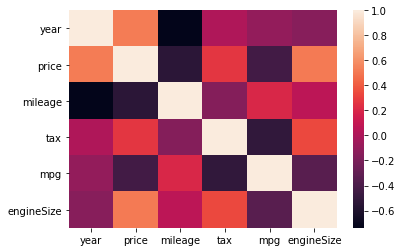

In [83]:
sbn.heatmap(data.corr())

Bağımlı değişkenimiz olan price değişkeninin korelasyon dağılımı incelendiğinde neredeyse bütün değişkenlerle orta şiddetli bir korelasyona sahip olduğu görülüyor.

year değişkeni ile mileage değişkeni arasında neredeyde %75 oranında negatif bir korelasyon var. Bu da demek istemiş olabilir ki yeni arabalar üretildiği sürece insanlar o arabayı
uzun ömürlü olarak kullanmıyor ve yeni araba alıyor gibi bir yorum yapılabilir.

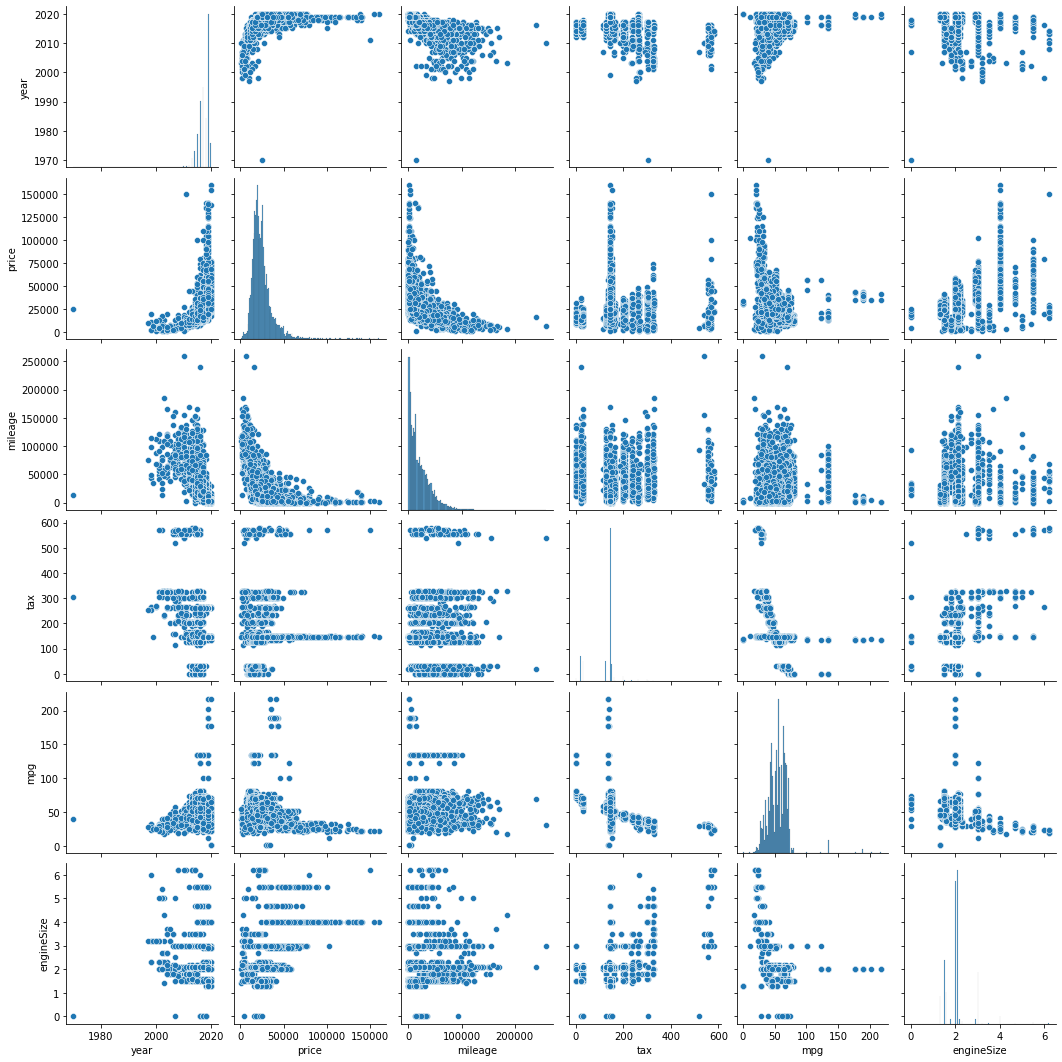

In [88]:
sbn.pairplot(data)

saçılım grafiği incelendiğinde bazı noktalarda kümelenme bazı noktalarda aykırı değerler bulunmakta.Bunlarla ilgili düşünmek gerekir

<AxesSubplot:xlabel='transmission', ylabel='price'>

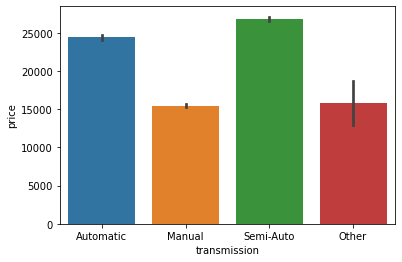

In [89]:
sbn.barplot(x="transmission",y="price",data=data)

In [93]:
data.groupby("transmission").describe()["price"]

,count,mean,std,min,25%,50%,75%,max
transmission,,,,,,,,
Automatic,4825.0,24406.959585,12549.608653,1490.0,16917.00,21489.0,28995.00,154998.0
Manual,1444.0,15442.434903,4242.892536,650.0,12800.00,14999.0,17420.00,36999.0
Other,2.0,15847.500000,4034.044187,12995.0,14421.25,15847.5,17273.75,18700.0
Semi-Auto,6848.0,26858.461157,11451.014446,1995.0,19965.00,24790.0,30199.00,159999.0


vites türünün price değişkenine göre dağılımı

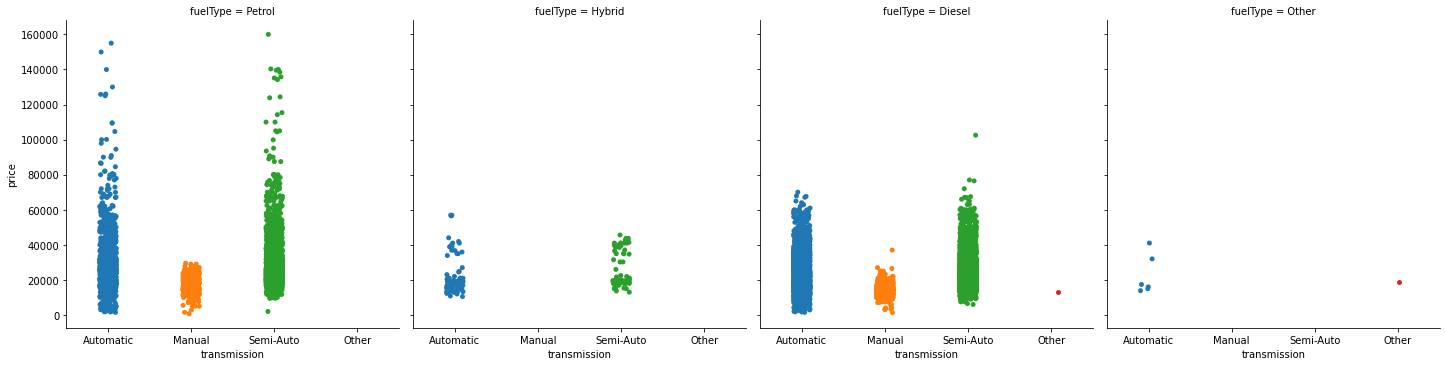

In [103]:
sbn.catplot(x="transmission",y="price",data=data,col="fuelType")

price değişkeninin dağılımı

C:\Users\omerm\anaconda3\envs\PythonProjeleri\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


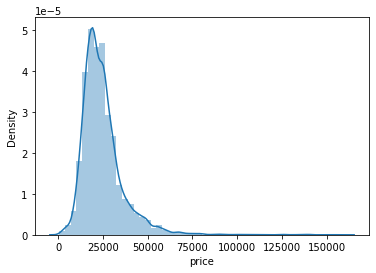

In [111]:
sbn.distplot(a=df.price);

<AxesSubplot:xlabel='price', ylabel='Density'>

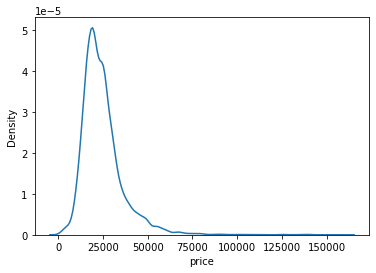

In [116]:
sbn.kdeplot(df.price,shade=False)

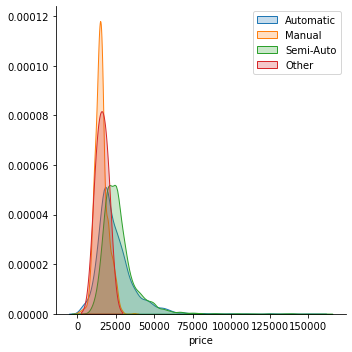

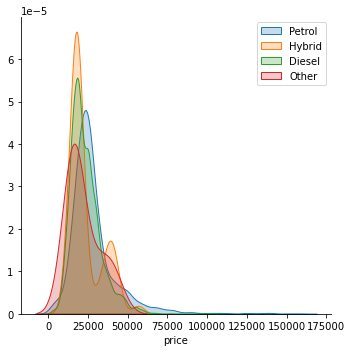

In [125]:
sbn.FacetGrid(data,hue="transmission",height=5).map(sbn.kdeplot,"price",shade=True)
plt.legend()
plt.show()
sbn.FacetGrid(df,hue="fuelType",height=5).map(sbn.kdeplot,"price",shade=True)
plt.legend()
plt.show()

kdeplot ile çizilen price değişkeninin dağılımındaki hafif bi tepeli bir yapı bulunmakta. Bu hafif tepelenmenin nedeni petrol değişkeni olabilir.

<AxesSubplot:xlabel='fuelType', ylabel='price'>

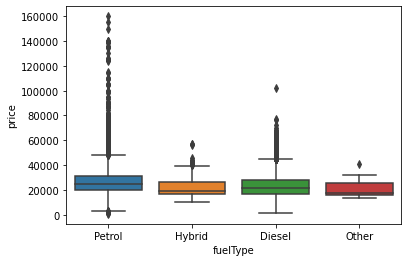

In [127]:
sbn.boxplot(x="fuelType",y="price",data=data)

In [131]:
np.sort(data.year.unique())

array([1970, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
       2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
       2018, 2019, 2020], dtype=int64)

### Veri ön işleme

yıl değişkeninin dağılımı incelendiğinde 60000'den sonraki değerler ve 10000'den küçük fiyatlı araçlar çok nadir bulunmakta o yüzden o değerleri ayrı bir veri olarak tutacağım


In [146]:
veri1=data[(data.price>60000)|(data.price<10000)]
veri1

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,SLK,2005,5200,Automatic,63000,Petrol,325,32.1,1.8
3,G Class,2016,61948,Automatic,16000,Petrol,325,30.4,4.0
4,G Class,2016,73948,Automatic,4000,Petrol,325,30.1,4.0
5,SL CLASS,2011,149948,Automatic,3000,Petrol,570,21.4,6.2
8,G Class,2019,139948,Automatic,12000,Petrol,145,21.4,4.0
...,...,...,...,...,...,...,...,...,...
12888,GLC Class,2019,68900,Automatic,6007,Petrol,145,22.1,4.0
12959,M Class,2009,9990,Automatic,59000,Diesel,555,30.4,3.0
13002,GLE Class,2018,66974,Automatic,16592,Petrol,145,23.7,5.5
13038,C Class,2020,68995,Automatic,2000,Petrol,145,28.0,4.0


fuelType ve transmission kategorilerinde çok nadir olan değerler bulunmakta onlardan da kurtulalım

In [149]:
data.drop(index=veri1.index,inplace=True)

In [152]:
data.drop(index=data[(data.fuelType=="Other")|(data.fuelType=="Hybrid")].index,inplace=True)

In [154]:
data.fuelType.value_counts()

Diesel    8905
Petrol    3495
Name: fuelType, dtype: int64

In [150]:
data.fuelType.value_counts()

Diesel    8905
Petrol    3495
Hybrid     173
Other        7
Name: fuelType, dtype: int64

In [151]:
data.transmission.value_counts()

Semi-Auto    6705
Automatic    4537
Manual       1336
Other           2
Name: transmission, dtype: int64

In [162]:
(data.model.value_counts())

 C Class      3477
 A Class      2458
 E Class      1865
 GLC Class     935
 GLA Class     846
 B Class       530
 CL Class      510
 GLE Class     445
 SL CLASS      245
 CLS Class     234
 V Class       206
 S Class       145
 GL Class      119
 CLA Class      86
 X-CLASS        82
 M Class        68
 GLS Class      62
 SLK            61
 GLB Class      19
 G Class         3
200              1
180              1
 R Class         1
220              1
Name: model, dtype: int64

500'den az gözlenen modelleri veri setinden atalım

In [168]:
data.drop(inplace=True,index=data.model.value_counts()[data.model.value_counts()<500].index)

KeyError: "[' GLE Class' ' SL CLASS' ' CLS Class' ' V Class' ' S Class' ' GL Class'\n ' CLA Class' ' X-CLASS' ' M Class' ' GLS Class' ' SLK' ' GLB Class'\n ' G Class' '200' '180' ' R Class' '220'] not found in axis"

In [175]:
data.model.value_counts()[data.model.value_counts()<500].index

Index([' GLE Class', ' SL CLASS', ' CLS Class', ' V Class', ' S Class',
       ' GL Class', ' CLA Class', ' X-CLASS', ' M Class', ' GLS Class', ' SLK',
       ' GLB Class', ' G Class', '200', '180', ' R Class', '220'],
      dtype='object')

In [179]:
def deneme(x):
    c=data.model.value_counts()[data.model.value_counts()<500].index
    if(x in c):
        return True
    return False
data.drop(index=data[data.model.apply(deneme)].index,inplace=True)

KAtegorik değerleri sayısal değere dönüştürme

In [183]:
veri=pd.get_dummies(data)
veri.drop(columns="fuelType_Diesel")
veri

,year,price,mileage,tax,mpg,engineSize,model_ A Class,model_ B Class,model_ C Class,model_ CL Class,model_ E Class,model_ GLA Class,model_ GLC Class,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Petrol
9,2017,19750,15258,30,64.2,2.1,0,0,0,0,0,1,0,1,0,0,1,0
10,2020,32980,606,145,35.8,2.0,1,0,0,0,0,0,0,1,0,0,0,1
11,2020,26980,1000,145,62.8,1.5,1,0,0,0,0,0,0,1,0,0,1,0
12,2019,23750,278,145,55.4,2.0,0,1,0,0,0,0,0,1,0,0,1,0
14,2016,18980,41713,125,56.6,2.1,0,0,0,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13112,2019,30399,5000,145,61.4,2.0,0,0,1,0,0,0,0,1,0,0,1,0
13113,2020,30999,1000,145,64.2,2.0,0,0,1,0,0,0,0,1,0,0,1,0
13114,2020,35999,500,145,55.4,2.0,0,0,1,0,0,0,0,1,0,0,1,0
13115,2020,24699,2500,145,55.4,2.0,0,1,0,0,0,0,0,1,0,0,1,0


model oluşturma

In [185]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score,cross_val_predict,cross_validate,train_test_split
import statsmodels.api as sm

In [187]:
X=sm.add_constant(data=veri)
X.head()

,const,year,price,mileage,tax,mpg,engineSize,model_ A Class,model_ B Class,model_ C Class,model_ CL Class,model_ E Class,model_ GLA Class,model_ GLC Class,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Petrol
9,1.0,2017,19750,15258,30,64.2,2.1,0,0,0,0,0,1,0,1,0,0,1,0
10,1.0,2020,32980,606,145,35.8,2.0,1,0,0,0,0,0,0,1,0,0,0,1
11,1.0,2020,26980,1000,145,62.8,1.5,1,0,0,0,0,0,0,1,0,0,1,0
12,1.0,2019,23750,278,145,55.4,2.0,0,1,0,0,0,0,0,1,0,0,1,0
14,1.0,2016,18980,41713,125,56.6,2.1,0,0,0,0,0,1,0,1,0,0,1,0


In [199]:
x=veri.drop(columns="price")
y=veri["price"]
lm=sm.OLS(endog=y,exog=x)
lm=lm.fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     3491.
Date:                Wed, 11 Aug 2021   Prob (F-statistic):               0.00
Time:                        18:13:53   Log-Likelihood:            -1.0134e+05
No. Observations:               10621   AIC:                         2.027e+05
Df Residuals:                   10606   BIC:                         2.028e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
year                    2321.9305     31.558     73.576      0.000    2260.070    2383.791
mileage                   -0.1027      0.003    -36.538      0.000      -0.108      -0.097
tax                      -17.5250      0.797    -22.001      0.000     -19.086     -15.964
mpg                     -234.9148      6.053    -38.810      0.000    -246.780    -223.050
engineSize              5787.7990    100.679     57.488      0.000    5590.450    5985.148
model_ A Class         -6.824e+05   9330.085    -73.138      0.000   -7.01e+05   -6.64e+05
model_ B Class         -6.848e+05   9336.219    -73.345      0.000   -7.03e+05   -6.66e+05
model_ C Class         -6.812e+05   9337.245    -72.959      0.000      -7e+05   -6.63e+05
model_ CL Class        -6.815e+05   9329.976    -73.047      0.000      -7e+05   -6.63e+05
model_ E Class         -6.796e+05   9338.028    -72.774      0.000   -6.98e+05   -6.61e+05
model_ GLA Class       -6.831e+05   9325.087    -73.251      0.000   -7.01e+05   -6.65e+05
model_ GLC Class       -6.771e+05   9337.241    -72.512      0.000   -6.95e+05   -6.59e+05
transmission_Automatic -1.589e+06   2.18e+04    -72.990      0.000   -1.63e+06   -1.55e+06
transmission_Manual    -1.591e+06   2.18e+04    -73.068      0.000   -1.63e+06   -1.55e+06
transmission_Semi-Auto -1.589e+06   2.18e+04    -72.966      0.000   -1.63e+06   -1.55e+06
fuelType_Diesel        -2.384e+06   3.27e+04    -72.975      0.000   -2.45e+06   -2.32e+06
fuelType_Petrol        -2.385e+06   3.27e+04    -73.041      0.000   -2.45e+06   -2.32e+06
==============================================================================
Omnibus:                     1542.122   Durbin-Watson:                   1.709
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5577.796
Skew:                           0.709   Prob(JB):                         0.00
Kurtosis:                       6.254   Cond. No.                     2.95e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is  9e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [200]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
lm_model=LinearRegression()
lm_model.fit(x_train,y_train)

LinearRegression()

In [201]:
print("Eğitim Hatası:{}\nTest Hatası:{}\nR2 Score:{}".format(
    np.sqrt(mean_squared_error(y_train,lm_model.predict(x_train))),
    np.sqrt(mean_squared_error(y_test,lm_model.predict(x_test)))
,r2_score(y_train,lm_model.predict(x_train))
))

Eğitim Hatası:3335.3264683102097
Test Hatası:3452.1476299214128
R2 Score:0.8254948832138607


Hataları görselleştirme

In [202]:
lm.params

year                      2.321931e+03
mileage                  -1.027247e-01
tax                      -1.752498e+01
mpg                      -2.349148e+02
engineSize                5.787799e+03
model_ A Class           -6.823843e+05
model_ B Class           -6.847631e+05
model_ C Class           -6.812338e+05
model_ CL Class          -6.815291e+05
model_ E Class           -6.795684e+05
model_ GLA Class         -6.830740e+05
model_ GLC Class         -6.770592e+05
transmission_Automatic   -1.589416e+06
transmission_Manual      -1.590884e+06
transmission_Semi-Auto   -1.589312e+06
fuelType_Diesel          -2.384253e+06
fuelType_Petrol          -2.385359e+06
dtype: float64

In [203]:
lm.fittedvalues

9        21570.490171
10       33703.165641
11       25531.491052
12       25537.178040
14       16651.456144
             ...     
13112    27171.890224
13113    29246.958225
13114    31365.570645
13115    27630.854210
13116    35920.880870
Length: 10621, dtype: float64

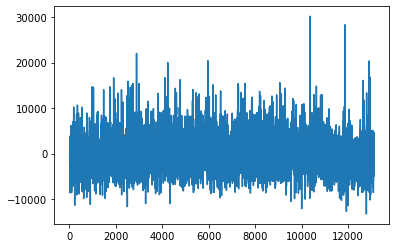

In [206]:
lm.resid.plot();

Model Tuning

In [209]:
lm_model.score(x_train,y_train)

0.8254948832138607

In [212]:
print("Tune edilmiş eğitim seti hatası {}".format(np.sqrt(-cross_val_score(estimator=lm_model,X=x_train,y=y_train,cv=10,scoring="neg_mean_squared_error")).mean()))
print("Tune edilmiş test seti hatası {}".format(np.sqrt(-cross_val_score(estimator=lm_model,X=x_test,y=y_test,cv=10,scoring="neg_mean_squared_error")).mean()))

Tune edilmiş eğitim seti hatası 3342.884141489664
Tune edilmiş test seti hatası 3448.123087163976


PCR ile model oluşturma

In [213]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
pca=PCA()
x_reduced_train=pca.fit_transform(scale(x_train))
x_reduced_test=pca.transform(scale(x_test))

bağımsız değişkenlerin açıklama varyanslarına bakalım öncelikle

In [214]:
np.cumsum(a=np.round(pca.explained_variance_ratio_,decimals=4)*100)

array([ 20.48,  33.83,  44.79,  53.53,  61.6 ,  68.38,  74.85,  81.19,
        86.92,  91.58,  95.07,  97.69,  99.11, 100.01, 100.01, 100.01,
       100.01])

9-10 değişkenle veri iyi şekilde açıklanabilir sanki 

2 boyuta indirgeyip böyle test edelim

In [216]:
pcr_model=LinearRegression().fit(x_reduced_train,y_train)

In [217]:
print("Eğitim Hatası:{}\nTest Hatası:{}\nR2 Score:{}".format(
    np.sqrt(mean_squared_error(y_train,pcr_model.predict(x_reduced_train))),
    np.sqrt(mean_squared_error(y_test,pcr_model.predict(x_reduced_test)))
,r2_score(y_train,pcr_model.predict(x_reduced_train))
))

Eğitim Hatası:3335.3264683101925
Test Hatası:3453.964506416236
R2 Score:0.8254948832138624


PCR model tuning

In [218]:
from sklearn.model_selection import KFold

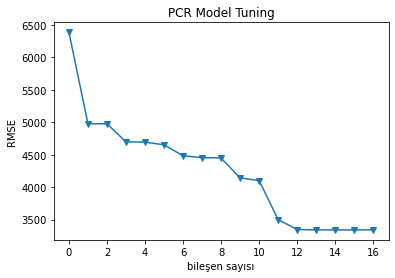

In [220]:
cv_10=KFold(n_splits=10,shuffle=True,random_state=42)
lm_model=LinearRegression()
rmse=list()
for i in np.arange(1,x_reduced_train.shape[1]+1):
    score=np.sqrt(-1*cross_val_score(estimator=lm_model,
                                     X=x_reduced_train[:,:i],
                                     y=y_train.ravel(),
                                     cv=cv_10,
                                     scoring="neg_mean_squared_error")).mean()
    rmse.append(score)
plt.plot(rmse,"-v")
plt.xlabel("bileşen sayısı")
plt.ylabel("RMSE")
plt.title("PCR Model Tuning")
plt.show()

In [223]:
final_model=LinearRegression()
final_model.fit(x_reduced_train[:,:13],y_train)
print("Eğitim Hatası:{}\nTest Hatası:{}\nR2 Score:{}".format(
    np.sqrt(mean_squared_error(y_train,final_model.predict(x_reduced_train[:,:13]))),
    np.sqrt(mean_squared_error(y_test,final_model.predict(x_reduced_test[:,:13])))
,r2_score(y_train,final_model.predict(x_reduced_train[:,:13]))
))

Eğitim Hatası:3341.947810342538
Test Hatası:3462.1046830985397
R2 Score:0.8248013349256849


PLS model

In [224]:
from sklearn.cross_decomposition import PLSRegression,PLSSVD

In [225]:
pls_model=PLSRegression()
pls_model.fit(x_train,y_train)
print("Eğitim Hatası:{}\nTest Hatası:{}\nR2 Score:{}".format(
    np.sqrt(mean_squared_error(y_train,pls_model.predict(x_train))),
    np.sqrt(mean_squared_error(y_test,pls_model.predict(x_test)))
,r2_score(y_train,pls_model.predict(x_train))
))

Eğitim Hatası:3806.044373114122
Test Hatası:3934.3825237461147
R2 Score:0.7727629407169321


C:\Users\omerm\anaconda3\envs\PythonProjeleri\lib\site-packages\sklearn\cross_decomposition\_pls.py:353: UserWarning: X scores are null at iteration 14
  warnings.warn('X scores are null at iteration %s' % k)
C:\Users\omerm\anaconda3\envs\PythonProjeleri\lib\site-packages\sklearn\cross_decomposition\_pls.py:353: UserWarning: X scores are null at iteration 14
  warnings.warn('X scores are null at iteration %s' % k)
C:\Users\omerm\anaconda3\envs\PythonProjeleri\lib\site-packages\sklearn\cross_decomposition\_pls.py:353: UserWarning: X scores are null at iteration 14
  warnings.warn('X scores are null at iteration %s' % k)
C:\Users\omerm\anaconda3\envs\PythonProjeleri\lib\site-packages\sklearn\cross_decomposition\_pls.py:353: UserWarning: X scores are null at iteration 14
  warnings.warn('X scores are null at iteration %s' % k)
C:\Users\omerm\anaconda3\envs\PythonProjeleri\lib\site-packages\sklearn\cross_decomposition\_pls.py:353: UserWarning: X scores are null at iteration 14
  warnings.w

Text(0.5, 1.0, 'Salary')

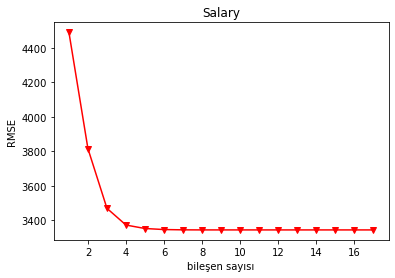

In [227]:
cv_10=KFold(n_splits=10,shuffle=True,random_state=1)
rmse=list()
for i in np.arange(1,x_train.shape[1]+1):
    pls=PLSRegression(n_components=i)
    score=np.sqrt(-1*cross_val_score(estimator=pls,
                                     X=x_train,y=y_train,
                                     cv=cv_10,scoring="neg_mean_squared_error").mean())
    rmse.append(score)
plt.plot(np.arange(1,x_train.shape[1]+1),np.array(rmse),"-v",c="r")
plt.xlabel("bileşen sayısı")
plt.ylabel("RMSE")
plt.title("Salary")

In [228]:
final_model=PLSRegression(5)
final_model.fit(x_train,y_train)
print("Eğitim Hatası:{}\nTest Hatası:{}\nR2 Score:{}".format(
    np.sqrt(mean_squared_error(y_train,final_model.predict(x_train))),np.sqrt(mean_squared_error(y_test,final_model.predict(x_test)))
,r2_score(y_train,final_model.predict(x_train))
))

Eğitim Hatası:3343.48962821479
Test Hatası:3455.597552461482
R2 Score:0.8246396407522821


<AxesSubplot:xlabel='model', ylabel='price'>

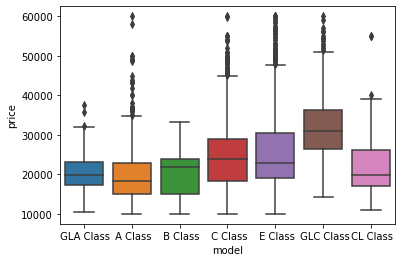

In [182]:
sbn.boxplot(x="model",y="price",data=data)

In [139]:
pd.concat([data.describe([0.05,0.1,0.25,0.3,0.5,0.75,0.9]).T,pd.DataFrame({
"variance":varianca,"skewness":skewness,"kurtosis":kurtosis
},index=data.describe().T.index)],axis=1)

,count,mean,std,min,5%,10%,25%,30%,50%,75%,90%,max,variance,skewness,kurtosis
year,13119.0,2017.296288,2.224709,1970.0,2014.0,2015.0,2016.0,2016.0,2018.0,2019.0,2019.0,2020.0,4.949331e+00,-2.897231,25.846402
price,13119.0,24698.596920,11842.675542,650.0,11649.0,13868.4,17450.0,18449.0,22480.0,28980.0,38000.0,159999.0,1.402490e+08,2.650461,15.441843
mileage,13119.0,21949.559037,21176.512267,1.0,1000.0,1987.0,6097.5,8069.4,15189.0,31779.5,49277.4,259000.0,4.484447e+08,1.884203,6.290549
tax,13119.0,129.972178,65.260286,0.0,20.0,20.0,125.0,145.0,145.0,145.0,150.0,580.0,4.258905e+03,1.231735,9.828966
mpg,13119.0,55.155843,15.220082,1.1,31.7,36.7,45.6,47.1,56.5,64.2,68.9,217.3,2.316509e+02,2.157475,16.459044
engineSize,13119.0,2.071530,0.572426,0.0,1.3,1.5,1.8,2.0,2.0,2.1,3.0,6.2,3.276716e-01,2.135384,8.833675


In [108]:
data[(data.transmission=="Semi-Auto")&(data.price>80000)&(data.fuelType=="Diesel")]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
3978,G Class,2019,102502,Semi-Auto,8691,Diesel,150,11.0,3.0
